The COVID-19 pandemic increased the player base of the Video Gaming Industry because the entire
populace was confined to their houses to adhere to the self-isolation policies. This notebook discusses the
relationship between in-game player behaviours and their real-life environmental perceptions by using
the dataset derived from 640 game players. Animal Crossing: New Horizons (ACNH) came out in
March 2020. The dataset has been designed by collecting necessary data from the players across 29
countries using Google Forms, which includes six major categories: Socio-Demographic Profile,
COVID-19 Concerns, Environmental Perceptions, Game Playing Habits, In-Game Behaviour and
Game-Playing Feeling.

The aim of this analysis is to identify key relations between a players' in-game behaviour to thier environmental opinions, and classifying individuals as either human-centric (Non Environmental Friendly) or Environmentalist (Environmental Friendly) based on their responses to this questionnaire.

### Importing Necessary Dependancies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns


### Importing Dataset

In [2]:
data = pd.read_csv('C:/Users/rosha/Downloads/data_640_validated.csv',encoding='latin1')

In [3]:
data.head()

,Unnamed: 0,ï..O1,A1_1,A1_2,A2,A3,A4,A5,A6,A7,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
0,598,5/29/2020 8:11,Filipino,Asia,Male,Secondary school,A pet,11,Asian,"Single, never married",...,1,2,5,4,5,4,1,5,1,1
1,230,5/23/2020 1:54,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,2,5,4,2,4,1,4
2,232,5/23/2020 2:01,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",...,1,1,4,1,5,3,2,5,2,4
3,308,5/25/2020 1:34,Filipino,Asia,Female,High school,A pet,13,Asian,"Single, never married",...,3,2,3,4,5,5,2,5,1,2
4,231,5/23/2020 2:00,Mexican American,US/Canada,Male,Secondary school,A pet,14,Hispanic or Latino,"Single, never married",...,5,4,4,3,4,4,1,5,5,5


In [4]:
data.columns

Index(['Unnamed: 0', 'ï..O1', 'A1_1', 'A1_2', 'A2', 'A3', 'A4', 'A5', 'A6',
       'A7', 'A8', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'D1', 'D2', 'D3',
       'D4', 'D5', 'D6', 'D7', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8',
       'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18',
       'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28',
       'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31',
       'F32'],
      dtype='object')

### Data Quality Checks

In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True) #dropping the first column since its not needed for the analysis

In [6]:
data.columns

Index(['ï..O1', 'A1_1', 'A1_2', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'B1',
       'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6',
       'D7', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
       'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20',
       'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'F1', 'F2',
       'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13',
       'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
       'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32'],
      dtype='object')

In [130]:
socio_demo_cols = ['A1_1', 'A1_2', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']

for col in socio_demo_cols:
    print(data[col].unique())
    print('---------------------')

['Filipino ' 'American' 'Filipino' 'Mexican American ' 'British '
 'american' 'Vietnamese' 'Vietnam' 'Friendly' 'canadian' 'Norwegian'
 'New Zealander' 'German' 'Singaporean' 'British' 'USA' 'U.S.'
 'White British ' 'Polish-American' 'Australian' 'American ' 'White'
 'Canadian' 'Scottish' 'Citizen of the United States' 'Viet nam'
 'Portuguese-Canadian' 'United States' 'us' 'white' 'Mixed'
 'British / Filipino, I am a dual citizen ' 'Vietnamese-American'
 'America' 'White British' 'Welsh, British' 'White English '
 'British - White ' 'South Korean' 'Italian' 'Anerican' 'Cornish'
 'Hispanic ' 'Myanmar' 'North American' 'China' ' American' 'Viet Nam'
 'usa' 'Asian' 'German, Native American ' 'Vieynam' 'Chinese' 'indonesian'
 'American (United States of America) ' 'Caucasian '
 'American (United States)' 'American (U.S.A.)' 'US Citizen' 'Usa'
 'French' 'Catalan (spanish)' 'Indonesia ' 'English '
 'United States of America' 'Filipino-American' 'Canadian ' 'Japanese'
 'uk' ' America' 'US' 'B

Quite a large number of misspellings can be observed in the column A1_1 (Nationality). Since the columns A1_1 and A1_2 give out the same information, A1_1 has been decided to be dropped from further analysis. Moreover, it can be noticed that column A3 is an ordinal data, while the rest have no inherent order to them. 

In [8]:
data.isna().sum()

ï..O1    0
A1_1     0
A1_2     0
A2       0
A3       0
        ..
F28      0
F29      0
F30      0
F31      0
F32      0
Length: 95, dtype: int64

In [9]:
#show columns with missing values and the count of missing values
data.isna().sum()[data.isna().sum() > 0]

#data.columns[data.isna().any()].tolist()

A4    86
D1     6
D2     5
D3     1
D4     1
D7    13
dtype: int64

The nan values in column A4 indicates the survey respondants answered 'None' for the question ("Whether the player has a pet/garden). Therefore these cannot be considered as missing values. The remaining missing values are from the 'Game-Playing Habit' columns of the player responses. 

array(['After k.k. slider finishes his concert',
       'Trying to keep the natural form of the island but making some parts industrial',
       'Keeping the natural theme of the original island but adding industrial parts to it',
       'Naturalistic vibe', 'I go for mostly a more grassy type style',
       'Putting paths', 'Natural ',
       'I like to make my villagers have their own cool areas to live in',
       'cute, but elegant', 'Forest',
       'i havent chosen an aesthetic for my island yet but i always try to add as much water scenery as possible',
       'Mountains', 'Modern, artificial', 'Old city style', 'M',
       'winter cabin themes', 'A natural mountain forest look!',
       'Ancient japanese', 'Symmetrical ',
       'I try my best to stick with my original layout/minimal terraforming.',
       'Just natural landscaping.', 'Maze', 'Building  rivers',
       'Natural with a little bit of development',
       'Unsure what this means. Also should be â\x80\x9cwhen you a

In [131]:
data['A4'] = data['A4'].fillna('None')

In [138]:
Game_playing_cols = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6','D7']
for col in Game_playing_cols:
    print(data[col].unique())
    print('---------------------')

['More than 3 years' '1-2 years' '2-3 years' '0-1 years' nan]
---------------------
['Action, Adventure, Simulation'
 'Action, Adventure, Simulation, Strategy, Varied themes all in one game ex: rec room, vr chat,'
 'Action, Adventure, Strategy, Creation games ex: rec room vrchat'
 'Adventure' 'Action, Adventure, Simulation, Strategy'
 'Action, Adventure, RPG, Simulation, Strategy'
 'Action, Adventure, RPG, Strategy' 'Adventure, Simulation, puzzle'
 'Action, Adventure, RPG, Simulation'
 'Action, Adventure, Simulation, Strategy, puzzle' 'RPG, Simulation'
 'Adventure, RPG, Strategy' 'Action, Adventure, RPG, MOBA' 'Simulation'
 'RPG, Strategy' 'FPS' 'Action, Adventure'
 'Action, Adventure, RPG, Simulation, Rhythm'
 'Adventure, RPG, Simulation, Strategy' 'Action, Adventure, RPG'
 'Action, Adventure, RPG, Simulation, Strategy, Sports' 'Strategy, Sports'
 'Adventure, Simulation, Strategy' 'Adventure, RPG, Simulation'
 'Adventure, Simulation' 'RPG, Strategy, Sports' 'RPG, Simulation, Sports'
 

Since D7 has different user inputs, I have not considered this for the analysis. Also, the questions in D-columns do not give good insights into a persons environmental opinions.

##### Find the age distribution of players

In [11]:
data['A5']

0          11
1          13
2          13
3          13
4          14
        ...  
635        48
636        49
637        55
638       30s
639    sub 28
Name: A5, Length: 640, dtype: object

Two invalid data can be seen in the Age Category (column A5), these have been dealt with by assuming 30s to be 30 and sub 28 to be 28. Due to the unavailability of a large dataset, I have tried to not remove such invalid data wherever possible.

In [17]:
data['A5'].replace('30s', '30' , inplace=True)
data['A5'].replace('sub 28', '28' , inplace=True)

In [18]:
#convert data type of A5 to int
data['A5'] = data['A5'].astype(int)

In [19]:
data['A5'].describe() #Age range is 11 - 55

count    640.000000
mean      26.104688
std        5.555241
min       11.000000
25%       22.000000
50%       26.000000
75%       29.000000
max       55.000000
Name: A5, dtype: float64

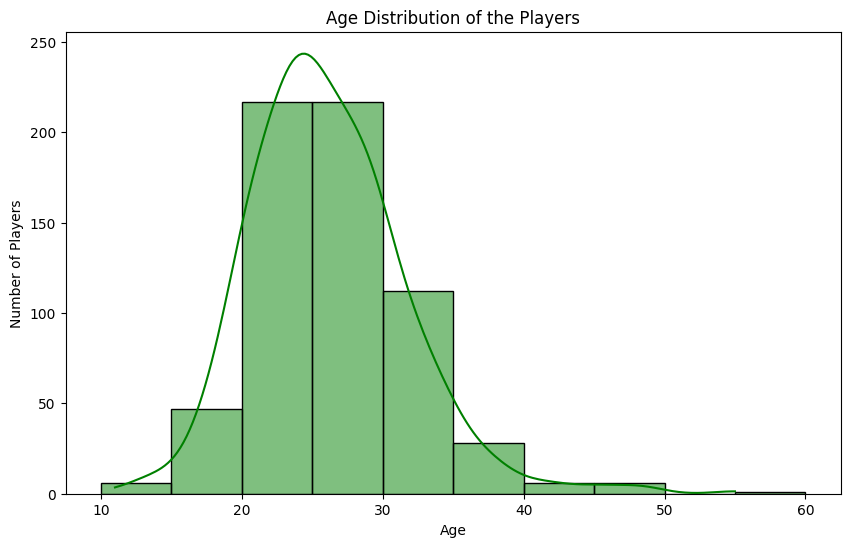

In [20]:
#Plotting the distribution of the age of the players.

plt.figure(figsize=(10,6))
sns.histplot(data['A5'], bins = [10,15,20,25,30,35,40,45,50,55,60],kde = True,color='green')
plt.title('Age Distribution of the Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

This indicates that a majority of the player base is around 20 to 30 years old.

In [21]:
A2_Male = data[data['A2'] == 'Male']
A2_Female = data[data['A2'] == 'Female']

In [22]:
A2_Male.head()

,ï..O1,A1_1,A1_2,A2,A3,A4,A5,A6,A7,A8,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
0,5/29/2020 8:11,Filipino,Asia,Male,Secondary school,A pet,11,Asian,"Single, never married",A student,...,1,2,5,4,5,4,1,5,1,1
1,5/23/2020 1:54,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",A student,...,1,1,4,2,5,4,2,4,1,4
2,5/23/2020 2:01,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",A student,...,1,1,4,1,5,3,2,5,2,4
4,5/23/2020 2:00,Mexican American,US/Canada,Male,Secondary school,A pet,14,Hispanic or Latino,"Single, never married",A student,...,5,4,4,3,4,4,1,5,5,5
6,5/21/2020 0:34,British,EU,Male,Primary school,A pet,15,White,"Single, never married",A student,...,1,1,4,2,4,4,1,4,3,1


##### Find the relatioin between Biological Sex and Environmental Perception

Create a new dataset for Environmental Perception Scores (ranges from 1-5), calculated using NEP scale. The odd numbered columns (C1,C3,...) use 1 as Strongly Disagree and 5 as Strongly Agree while the even numbered columns (C2,C4,...) use a reversed scale (1-Strongly Agree and 5-Strongly Disagree)

In [25]:
environmental_perception_columns = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15']
environmental_perception = pd.DataFrame()

for col in environmental_perception_columns:
    environmental_perception[col] = data[col]

In [26]:
environmental_perception.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,4,3,5,1,5,2,4,3,3,4,5,5,3,4,4
1,4,2,5,5,5,3,5,5,5,5,5,5,5,3,5
2,5,2,5,4,5,3,5,5,5,5,5,5,5,3,5
3,4,4,5,3,4,1,5,4,4,3,5,5,5,2,5
4,3,4,3,1,5,1,3,4,5,3,3,4,4,2,4


In [28]:
environmental_perception.astype(int)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,4,3,5,1,5,2,4,3,3,4,5,5,3,4,4
1,4,2,5,5,5,3,5,5,5,5,5,5,5,3,5
2,5,2,5,4,5,3,5,5,5,5,5,5,5,3,5
3,4,4,5,3,4,1,5,4,4,3,5,5,5,2,5
4,3,4,3,1,5,1,3,4,5,3,3,4,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,3,2,3,2,4,2,4,2,4,4,3,4,4,3,4
636,4,3,4,3,5,3,4,4,4,5,4,5,4,3,4
637,4,3,4,3,4,2,4,3,5,5,4,4,4,4,5
638,4,4,4,2,4,4,2,3,4,4,4,4,4,3,4


Taking the average of the scores in the environmental perception column to classify them as NEF and EF.

In [30]:
threshold = 3
data['EF/NEF'] = ""
for i, row in environmental_perception.iterrows():
    average_score = row.mean()
    
    if average_score > threshold:
        data['EF/NEF'][i] = 'EF'
    else:
        data['EF/NEF'][i] = 'NEF'


C:\Users\rosha\AppData\Local\Temp\ipykernel_17936\436354645.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EF/NEF'][i] = 'EF'
C:\Users\rosha\AppData\Local\Temp\ipykernel_17936\436354645.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EF/NEF'][i] = 'EF'
C:\Users\rosha\AppData\Local\Temp\ipykernel_17936\436354645.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EF/NEF'][i] = 'EF'
C:\Users\rosha\AppData\Local

In [31]:
data['EF/NEF'].value_counts()

EF/NEF
EF     545
NEF     95
Name: count, dtype: int64

This indicates that the data is highly imbalanced, indicating a need to use a sampled data of size 95 or 100 for a balanced and accurate result.

In [33]:
data['A2'].value_counts()

A2
Female    412
Male      228
Name: count, dtype: int64

In [34]:
data.groupby('EF/NEF')['A2'].value_counts()

EF/NEF  A2    
EF      Female    383
        Male      162
NEF     Male       66
        Female     29
Name: count, dtype: int64

In [35]:
data.groupby('EF/NEF')['A2'].value_counts(normalize=True)

EF/NEF  A2    
EF      Female    0.702752
        Male      0.297248
NEF     Male      0.694737
        Female    0.305263
Name: proportion, dtype: float64

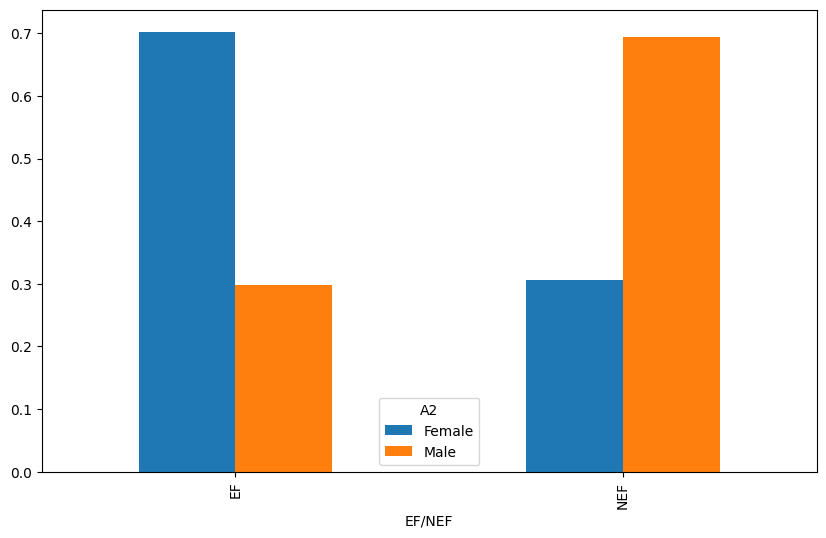

In [37]:
fig = data.groupby('EF/NEF')['A2'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=False, figsize=(10,6))

The graph shows that a larger proportion of females are more environmentally friendly when compared to the male players, indicating that males often choose activities in-game that could harm the environment around their player.

In [38]:
#change the value of data['EF/NEF'] to 1 for EF and 0 for NEF
data['EF/NEF'].replace('EF', 1, inplace=True)
data['EF/NEF'].replace('NEF', 0, inplace=True)
data['EF/NEF'].value_counts()

EF/NEF
1    545
0     95
Name: count, dtype: int64

In [40]:
#Calculate the average environmental perception score for each player
data['Average_Environmental_Perception'] = ""
for i,row in environmental_perception.iterrows():
    print(i,row.mean())
    data['Average_Environmental_Perception'][i] = row.mean() 

0 3.6666666666666665
1 4.466666666666667
2 4.466666666666667
3 3.933333333333333
4 3.2666666666666666
5 3.1333333333333333
6 3.933333333333333
7 4.066666666666666
8 3.6
9 2.933333333333333
10 3.8
11 3.8
12 3.066666666666667
13 3.1333333333333333
14 3.1333333333333333
15 3.6
16 3.6666666666666665
17 3.066666666666667
18 4.133333333333334
19 3.066666666666667
20 3.8
21 3.6
22 4.0
23 4.333333333333333
24 3.066666666666667
25 3.1333333333333333
26 3.8
27 3.7333333333333334
28 4.133333333333334
29 3.2
30 3.3333333333333335
31 3.933333333333333
32 3.4
33 3.066666666666667
34 3.1333333333333333
35 4.0
36 2.6
37 3.3333333333333335
38 4.266666666666667
39 3.6666666666666665
40 4.266666666666667
41 3.6666666666666665
42 4.466666666666667
43 4.066666666666666
44 3.7333333333333334
45 3.2666666666666666
46 3.8666666666666667
47 3.6
48 4.066666666666666
49 3.8666666666666667
50 4.333333333333333
51 4.2
52 3.6
53 3.2
54 4.333333333333333
55 3.533333333333333
56 4.0
57 3.2
58 3.2666666666666666
59 4.

C:\Users\rosha\AppData\Local\Temp\ipykernel_17936\3877856952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Average_Environmental_Perception'][i] = row.mean()
C:\Users\rosha\AppData\Local\Temp\ipykernel_17936\3877856952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Average_Environmental_Perception'][i] = row.mean()
C:\Users\rosha\AppData\Local\Temp\ipykernel_17936\3877856952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [173]:
data['Average_Environmental_Perception'].mean()

3.6061458333333363

In [139]:
avg_male_score = data[data['A2'] == 'Male']['Average_Environmental_Perception'].mean()
avg_male_score

3.3245614035087723

In [140]:
avg_fem_score = data[data['A2'] == 'Female']['Average_Environmental_Perception'].mean()
avg_fem_score

3.7619741100323627

<Axes: title={'center': 'Average Environmental Perception Score by Biological Sex'}, xlabel='Biological Sex', ylabel='Average Environmental Perception Score'>

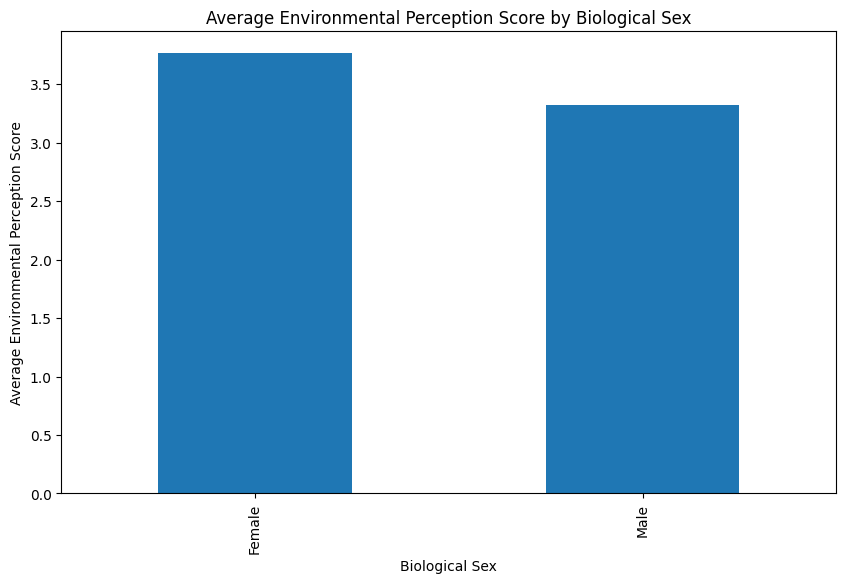

In [44]:
data.groupby('A2')['Average_Environmental_Perception'].mean().plot(kind='bar', figsize=(10,6), xlabel= 'Biological Sex', y = 'Average Environmental Perception Score', title = 'Average Environmental Perception Score by Biological Sex', ylabel= 'Average Environmental Perception Score')

This graph further shows that females have a higher environmental perception score than males.

##### Find the relation between Biological Sex and the act of cutting down trees

In [45]:
data['E17'].value_counts() 

E17
2    241
3    237
4    123
1     39
Name: count, dtype: int64

E17 is the column for the activity of cutting down trees. Therefore, by trying to estimate the frequency of performing this activity, we could get a better idea of a person's environmental perception based on their biological sex.

Text(0, 0.5, 'Number of Players')

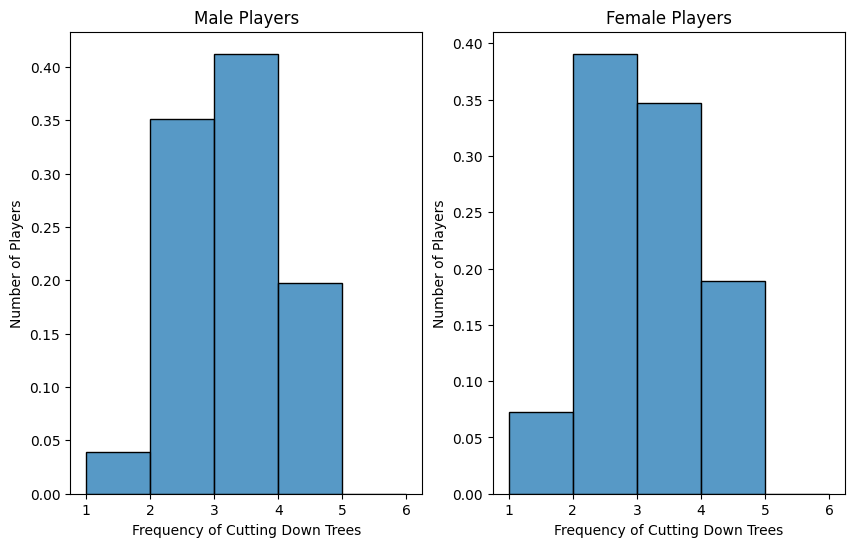

In [152]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

sns.histplot(data[data['A2'] == 'Male']['E17'], bins = [1,2,3,4,5,6],ax = ax[0],stat = 'probability')
ax[0].set_title("Male Players")
ax[0].set_xlabel("Frequency of Cutting Down Trees")
ax[0].set_ylabel("Number of Players")

sns.histplot(data[data['A2'] == 'Female']['E17'], bins = [1,2,3,4,5,6],ax=ax[1],stat = 'probability')
ax[1].set_title("Female Players")
ax[1].set_xlabel("Frequency of Cutting Down Trees")
ax[1].set_ylabel("Number of Players")


This graph shows that male players have a higher probability to cut down trees when compared to female players.

In [48]:
data.groupby('E17')['A2'].value_counts()

E17  A2    
1    Female     30
     Male        9
2    Female    161
     Male       80
3    Female    143
     Male       94
4    Female     78
     Male       45
Name: count, dtype: int64

In [49]:
data.groupby('E17')['A2'].value_counts(normalize=True)

E17  A2    
1    Female    0.769231
     Male      0.230769
2    Female    0.668050
     Male      0.331950
3    Female    0.603376
     Male      0.396624
4    Female    0.634146
     Male      0.365854
Name: proportion, dtype: float64

<Axes: title={'center': 'Frequency of Cutting Down Trees by Biological Sex'}, xlabel='Frequency of Cutting Down Trees', ylabel='Number of Players'>

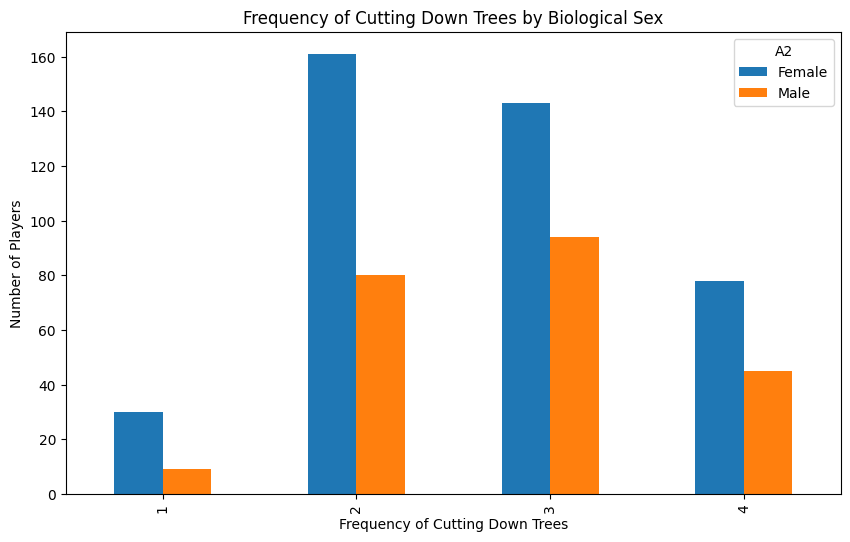

In [154]:
data.groupby('E17')['A2'].value_counts().unstack().plot(kind='bar', stacked=False, figsize=(10,6), xlabel= 'Frequency of Cutting Down Trees', ylabel= 'Number of Players', title = 'Frequency of Cutting Down Trees by Biological Sex')

This figure shows the number of players who put in scores 1-4 for the activity of cutting down trees in both male and female players.

In [51]:
data.groupby('A2')['E17'].mean()

A2
Female    2.652913
Male      2.767544
Name: E17, dtype: float64

<Axes: title={'center': 'Mean of the Frequency of Cutting Down Trees by Biological Sex'}, xlabel='Sex', ylabel='Mean of the Frequency of Cutting Down Trees'>

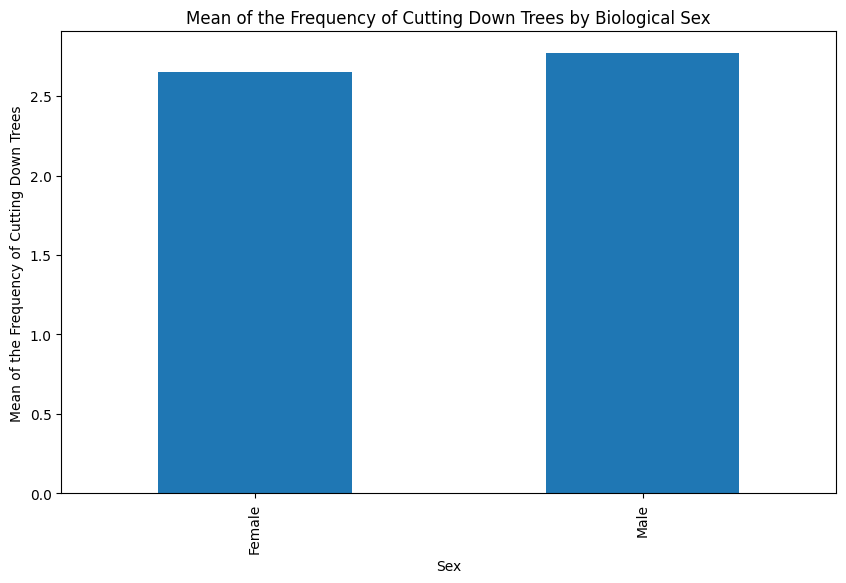

In [157]:
data.groupby('A2')['E17'].mean().plot(kind='bar', figsize=(10,6), ylabel= 'Mean of the Frequency of Cutting Down Trees', xlabel = 'Sex', title = 'Mean of the Frequency of Cutting Down Trees by Biological Sex')

### To find the important features leading to NEF/EF

The socio-demographic columns will be used to determine the important features that would classify an individual as an EF/NEF. For this, we use one-hot-encoding for the columns that do not follow inherent order and ordinal encoding for the column A3 (Education).

In [53]:
from sklearn.preprocessing import OrdinalEncoder
data_a3_reshaped = data['A3'].values.reshape(-1, 1)
encoder = OrdinalEncoder()
ordinal_encoded_data = encoder.fit_transform(data_a3_reshaped)


In [54]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoded_data = []
encoder = OneHotEncoder()
columns = ['A1_2', 'A2', 'A4', 'A5', 'A6', 'A7', 'A8']
one_hot_encoded_data = encoder.fit_transform(data[columns])


In [55]:
ordinal_encoded_data_df = pd.DataFrame(ordinal_encoded_data, columns = ['A3'])

In [56]:
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data.toarray(), columns=encoder.get_feature_names_out(['A1_2', 'A2', 'A4', 'A5', 'A6', 'A7', 'A8']))

In [57]:
combined_data = pd.concat([data['EF/NEF'],one_hot_encoded_df, ordinal_encoded_data_df], axis=1)

##### Correlation Matrix

In [58]:
combined_data.corr()

,EF/NEF,A1_2_Asia,A1_2_EU,A1_2_Other,A1_2_US/Canada,A2_Female,A2_Male,A4_A garden,A4_A pet,A4_Both,...,A8_A homemaker,A8_A student,A8_Employed for wages,A8_Military,A8_Out of work and looking for work,A8_Out of work but not currently looking for work,A8_Retired,A8_Self-employed,A8_Unable to work,A3
EF/NEF,1.000000,0.085223,0.133487,0.066855,-0.192137,0.295100,-0.295100,-0.015140,-0.056628,-0.005556,...,0.032392,0.080952,-0.097408,-0.055364,-0.013108,-0.021692,0.016516,0.043965,0.068967,0.053029
A1_2_Asia,0.085223,1.000000,-0.256307,-0.100167,-0.691564,-0.064405,0.064405,0.058531,0.025982,-0.172235,...,-0.022273,0.135883,-0.044827,-0.035024,-0.030611,-0.079418,0.063240,0.022319,-0.060109,-0.072910
A1_2_EU,0.133487,-0.256307,1.000000,-0.065610,-0.452980,0.128107,-0.128107,-0.038277,-0.140556,0.197302,...,-0.030828,0.037512,-0.011826,-0.022941,-0.046182,0.024787,-0.016209,-0.040923,0.098496,-0.016167
A1_2_Other,0.066855,-0.100167,-0.065610,1.000000,-0.177028,0.035527,-0.035527,0.043314,-0.092703,0.105274,...,0.181310,0.023495,-0.099245,-0.008965,0.022318,0.016181,-0.006335,-0.003955,0.035787,-0.066154
A1_2_US/Canada,-0.192137,-0.691564,-0.452980,-0.177028,1.000000,-0.043285,0.043285,-0.039496,0.104732,-0.016519,...,-0.015030,-0.156631,0.079997,0.050644,0.053229,0.049217,-0.043735,0.009930,-0.026368,0.098053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A8_Out of work but not currently looking for work,-0.021692,-0.079418,0.024787,0.016181,0.049217,0.010043,-0.010043,-0.046375,-0.050529,0.023979,...,-0.031385,-0.102367,-0.235718,-0.011750,-0.064351,1.000000,-0.008302,-0.057024,-0.034668,0.057226
A8_Retired,0.016516,0.063240,-0.016209,-0.006335,-0.043735,0.029429,-0.029429,-0.013527,-0.028137,-0.034010,...,-0.005916,-0.019296,-0.044431,-0.002215,-0.012130,-0.008302,1.000000,-0.010749,-0.006535,-0.030164
A8_Self-employed,0.043965,0.022319,-0.040923,-0.003955,0.009930,0.034494,-0.034494,-0.052569,-0.010214,0.053714,...,-0.040633,-0.132529,-0.305172,-0.015213,-0.083312,-0.057024,-0.010749,1.000000,-0.044883,0.010291
A8_Unable to work,0.068967,-0.060109,0.098496,0.035787,-0.026368,0.082304,-0.082304,0.102210,-0.014626,-0.043735,...,-0.024703,-0.080573,-0.185533,-0.009249,-0.050651,-0.034668,-0.006535,-0.044883,1.000000,0.004405


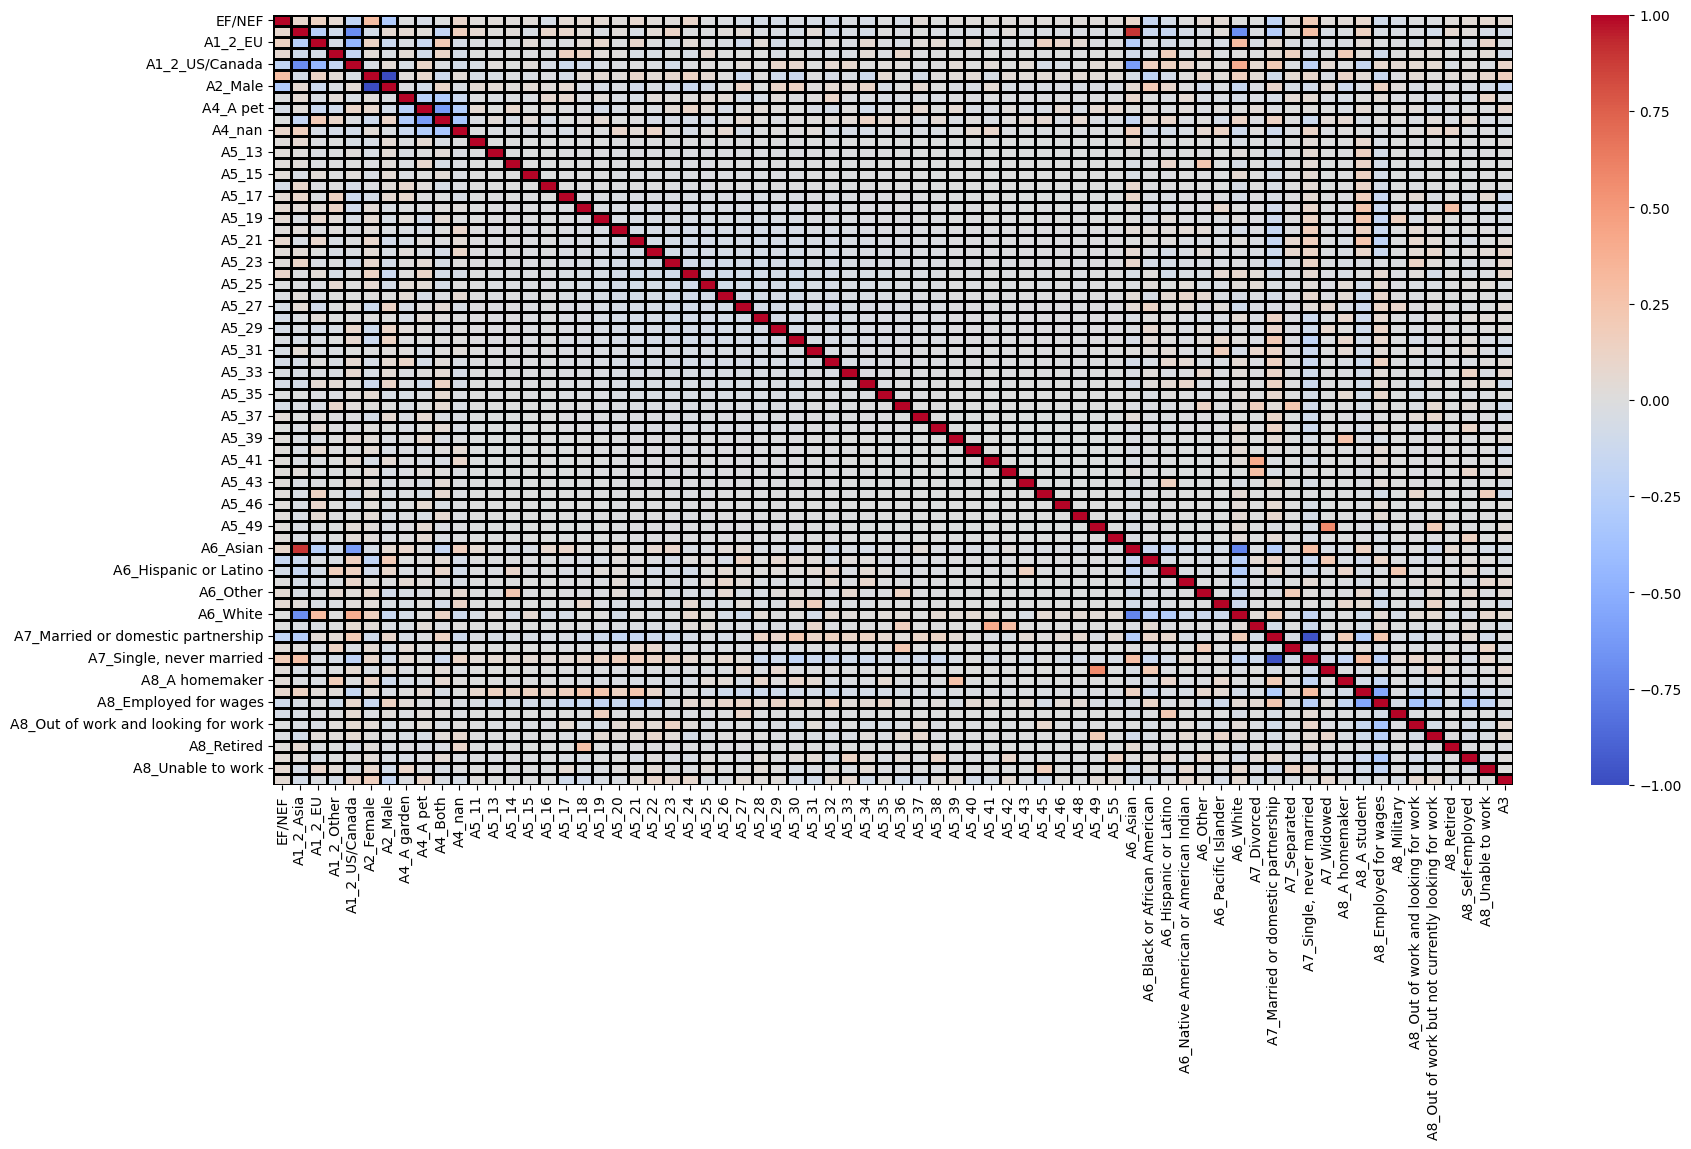

In [59]:

plt.figure(figsize=(20,10))
sns.heatmap(combined_data.corr(), cmap='coolwarm', linewidths=2, linecolor='black')
plt.show()


This heatmap does not give a clear picture of the correlation, thereby leading to the use of other techniques

##### Chi-squared Test

In [60]:
#perform chi square test to determine if there is a relationship between [A1_2,A2,A3,A4,A5,A6,A7,A8] and EF/NEF
from scipy.stats import chi2_contingency

columns = ['A1_2', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']
p_values = {}
for col in columns:
    contingency_table = pd.crosstab(data[col], data['EF/NEF'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p_values[col] = p

p_values

{'A1_2': 7.397844301890311e-06,
 'A2': 1.9906180423098803e-13,
 'A3': 0.3396424419711966,
 'A4': 0.7413092817761486,
 'A5': 0.38095091303736434,
 'A6': 0.00021316171002923123,
 'A7': 3.2980089524501554e-05,
 'A8': 0.09991814103630646}

In [61]:
#arrange p_values in ascending order
sorted_p_values = dict(sorted(p_values.items(), key=lambda item: item[1],reverse = True))
sorted_p_values

{'A4': 0.7413092817761486,
 'A5': 0.38095091303736434,
 'A3': 0.3396424419711966,
 'A8': 0.09991814103630646,
 'A6': 0.00021316171002923123,
 'A7': 3.2980089524501554e-05,
 'A1_2': 7.397844301890311e-06,
 'A2': 1.9906180423098803e-13}

The results of Chi-Squared Test show that columns A4,A5 and A3 (Pet/Garden,Age,Education) show a high positive feature importance, while columns A7,A1_2 and A2 (Marital Status,Region,Biological Sex) show the least feature importance score.

DATA PREPROCESSING

In [63]:
from sklearn.model_selection import train_test_split

In [164]:
X = combined_data.drop(['EF/NEF'], axis=1)
y = data['EF/NEF']

EF_sample = combined_data[data['EF/NEF'] == 1].sample(100)
NEF_sample = combined_data[data['EF/NEF'] == 0]
sample_data = pd.concat([EF_sample, NEF_sample])

In [165]:
EF_sample.shape

(100, 70)

In [166]:
NEF_sample.shape

(95, 70)

In [167]:
print(sample_data.shape)
print(sample_data['EF/NEF'].value_counts())

(195, 70)
EF/NEF
1    100
0     95
Name: count, dtype: int64


In [168]:
sample_data.columns

Index(['EF/NEF', 'A1_2_Asia', 'A1_2_EU', 'A1_2_Other', 'A1_2_US/Canada',
       'A2_Female', 'A2_Male', 'A4_A garden', 'A4_A pet', 'A4_Both', 'A4_nan',
       'A5_11', 'A5_13', 'A5_14', 'A5_15', 'A5_16', 'A5_17', 'A5_18', 'A5_19',
       'A5_20', 'A5_21', 'A5_22', 'A5_23', 'A5_24', 'A5_25', 'A5_26', 'A5_27',
       'A5_28', 'A5_29', 'A5_30', 'A5_31', 'A5_32', 'A5_33', 'A5_34', 'A5_35',
       'A5_36', 'A5_37', 'A5_38', 'A5_39', 'A5_40', 'A5_41', 'A5_42', 'A5_43',
       'A5_45', 'A5_46', 'A5_48', 'A5_49', 'A5_55', 'A6_Asian',
       'A6_Black or African American', 'A6_Hispanic or Latino',
       'A6_Native American or American Indian', 'A6_Other',
       'A6_Pacific Islander', 'A6_White', 'A7_Divorced',
       'A7_Married or domestic partnership', 'A7_Separated',
       'A7_Single, never married', 'A7_Widowed', 'A8_A homemaker',
       'A8_A student', 'A8_Employed for wages', 'A8_Military',
       'A8_Out of work and looking for work',
       'A8_Out of work but not currently looking f

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [169]:
X_sample = sample_data.drop(['EF/NEF'], axis=1)
y_sample = sample_data['EF/NEF']

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

##### FEATURE SELECTION USING RANDOM FOREST

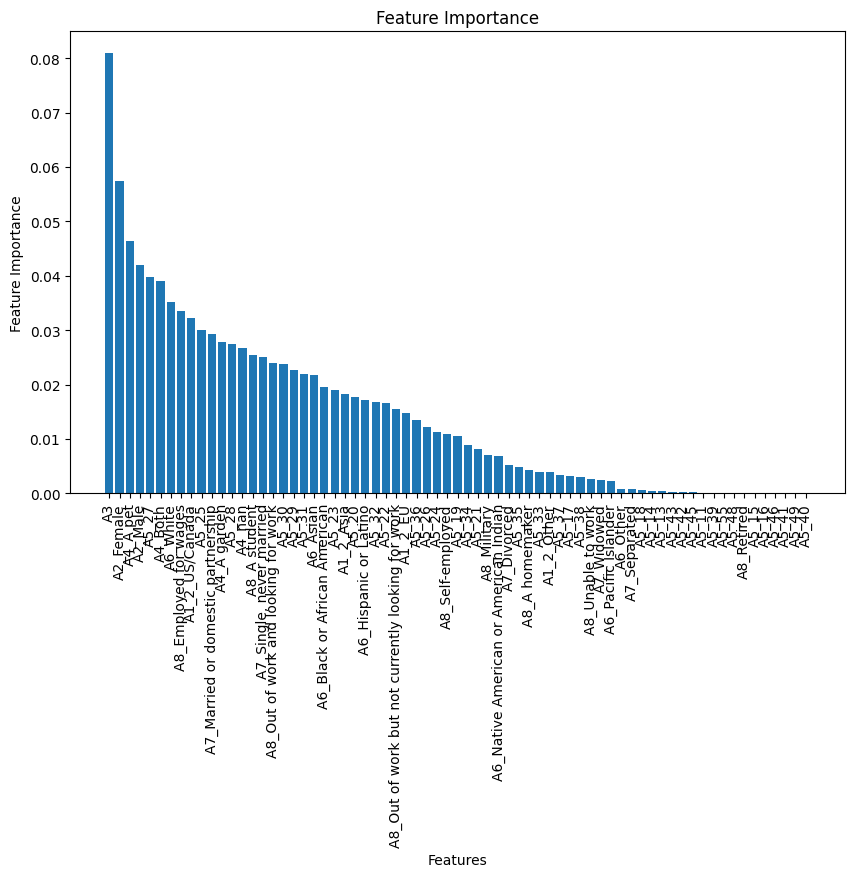

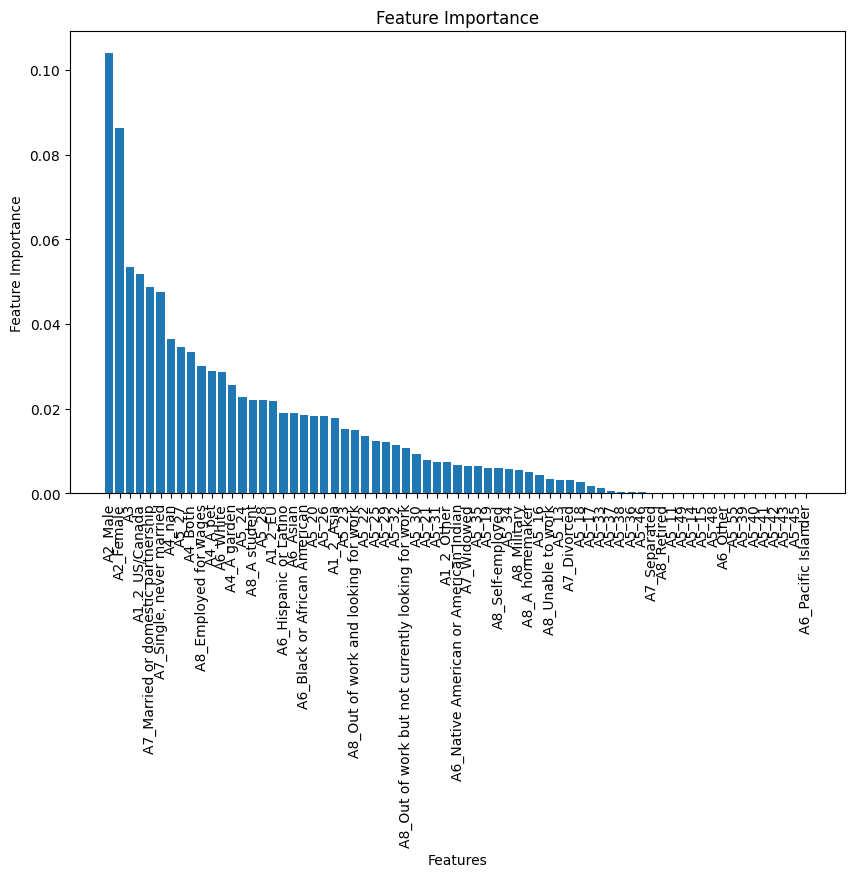

In [170]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

rf.fit(X_train_sample, y_train_sample)

feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train_sample.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X_train_sample.shape[1]), X_train_sample.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.show()



Feature Selection results show that A3,A4 and A2 (Education,Pet/Garden,Sex) are the most important features, while the older playerbases [A5 (Age)] is the least important.

However, by using the sample dataset, the results show that A2_Male, A2_Female and A3 are the most important features while the least important features is similar to that of its non-sampled counterpart.

##### RANDOM FEATURE EXTRACTION

In [172]:
from sklearn.feature_selection import RFE


rf = RandomForestClassifier()
rfe = RFE(estimator = rf, n_features_to_select = 4)  
rfe.fit(X_train, y_train)

selected_features1 = X_train.columns[rfe.support_]

X_train_selected = X_train[selected_features1]
rf_selected = RandomForestClassifier()  
rf_selected.fit(X_train_selected, y_train)

print('Selected features without sampling:', selected_features1)

rfe.fit(X_train_sample, y_train_sample)

selected_features2 = X_train_sample.columns[rfe.support_]

X_train_selected_sample = X_train_sample[selected_features2]
rf_selected_sample = RandomForestClassifier()
rf_selected_sample.fit(X_train_selected_sample, y_train_sample)

print('Selected features with sampling:', selected_features2)


Selected features without sampling: Index(['A2_Female', 'A4_A pet', 'A7_Married or domestic partnership', 'A3'], dtype='object')
Selected features with sampling: Index(['A2_Female', 'A2_Male', 'A7_Married or domestic partnership', 'A3'], dtype='object')


It can be observed that the results of RFE and feature selection is almost similar when using sampled data, thereby concluding that Biological Sex and Edcuation Levels are the most important features.

### RUNNING RANDOM FOREST MODELS ON THE DATASET TO CLASSIFY INDIVIDUALS AS NEF/EF 

In [75]:
#RUNNING RANDOM FOREST WITH GRID SEARCH ON UNSAMPLED DATA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200],  
    'max_depth': [None, 10, 20],     
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] }

RF_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = RF_model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best Training Accuracy: 0.8571285892634208


In [77]:
best_model = grid_search.best_estimator_

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [80]:
y_train_predict = best_model.predict(X_train)
y_train_acc = accuracy_score(y_train,y_train_predict)
y_train_acc

0.859375

In [81]:
y_test_predict = best_model.predict(X_test)
y_test_acc = accuracy_score(y_test, y_test_predict)
y_test_acc

0.84375

In [82]:
precision = precision_score(y_test, y_test_predict)
recall = recall_score(y_test, y_test_predict)
f1 = f1_score(y_test, y_test_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.84375
Recall: 1.0
F1-Score: 0.9152542372881356


In [83]:
confusion_matrix(y_test, y_test_predict)

array([[  0,  30],
       [  0, 162]], dtype=int64)

Running the RF model on unsampled data has wrongly predicted the NEF as EF as is seen in the confusion matrix, thereby, reducing the effectiveness of this model

In [174]:
#RUNNING RANDOM FOREST WITH GRID SEARCH ON SAMPLED DATA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200],  
    'max_depth': [None, 10, 20],     
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] }

RF_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = RF_model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2, scoring='accuracy')

grid_search.fit(X_train_sample, y_train_sample)

print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best Training Accuracy: 0.7431216931216932


In [104]:
best_model_2 = grid_search.best_estimator_

In [112]:
y_train_predict = best_model_2.predict(X_train_sample)
y_train_acc = accuracy_score(y_train_sample,y_train_predict)
y_train_acc

0.8602941176470589

In [113]:
y_test_predict = best_model_2.predict(X_test_sample)
y_test_acc = accuracy_score(y_test_sample, y_test_predict)
y_test_acc

0.6440677966101694

In [114]:
precision = precision_score(y_test_sample, y_test_predict)
recall = recall_score(y_test_sample, y_test_predict)
f1 = f1_score(y_test_sample, y_test_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6285714285714286
Recall: 0.7333333333333333
F1-Score: 0.6769230769230768


In [115]:
confusion_matrix(y_test_sample, y_test_predict)

array([[16, 13],
       [ 8, 22]], dtype=int64)

Here, The model has correctly classified more than half of the data (67% F1 score) as can be seen in the confusion matrix. We can see if this can be further improved by making use of a validation set.

##### USING TRAIN,VALIDATION,TEST sets

In [109]:
#SPLITTING DATASET INTO THREE, TRAINING, VALIDATION AND TESTING

X_sample_train, X_sample_temp, y_sample_train, y_sample_temp = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

X_sample_val, X_sample_test, y_sample_val, y_sample_test = train_test_split(X_sample_train, y_sample_train, test_size=0.5, random_state=42)

In [110]:
#RUNNING RANDOM FOREST WITH GRID SEARCH ON SAMPLED DATA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200],  
    'max_depth': [None, 10, 20],     
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] }

RF_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = RF_model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2, scoring='accuracy')

grid_search.fit(X_train_sample, y_train_sample)

print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best Training Accuracy: 0.7645502645502645


In [111]:
best_model_3 = grid_search.best_estimator_

In [120]:
y_val_predict = best_model_2.predict(X_sample_val)
y_val_acc = accuracy_score(y_sample_val, y_val_predict)
y_val_acc

0.8823529411764706

In [121]:
precision = precision_score(y_sample_val, y_val_predict)
recall = recall_score(y_sample_val, y_val_predict)
f1 = f1_score(y_sample_val, y_val_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.8611111111111112
Recall: 0.9117647058823529
F1-Score: 0.8857142857142858


In [122]:
confusion_matrix(y_sample_val, y_val_predict)

array([[29,  5],
       [ 3, 31]], dtype=int64)

The validation set has correctly predicted with an accuracy of 88.2%

In [123]:
X_train_final = pd.concat([X_sample_train, X_sample_val])
y_train_final = pd.concat([y_sample_train, y_sample_val])


In [124]:
grid_search.fit(X_train_final, y_train_final)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

In [125]:
print("Best Parameters:", grid_search.best_params_)
print("Best Training Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Training Accuracy: 0.8975609756097562


In [126]:
best_model_4 = grid_search.best_estimator_

In [127]:
y_test_predict = best_model_2.predict(X_sample_test)
y_test_acc = accuracy_score(y_sample_test, y_test_predict)
y_test_acc

0.8382352941176471

In [128]:
precision = precision_score(y_sample_test, y_test_predict)
recall = recall_score(y_sample_test, y_test_predict)
f1 = f1_score(y_sample_test, y_test_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.8205128205128205
Recall: 0.8888888888888888
F1-Score: 0.8533333333333333


In [129]:
confusion_matrix(y_sample_test, y_test_predict)

array([[25,  7],
       [ 4, 32]], dtype=int64)

The model has now correctly predicted around 83.2% of the data, increasing the accuracy from 64% without using the validation sets to an 83% by making use of the validaiton sets. The model used is a Random Forest Model, where gridsearch was implement to find the best parameters for a more accurate model.

# CONCLUSION


The dataset provided presented numerous data quality issues. All of them have been discussed
in detail. Some of the issues were fixed to prevent any complications in the analysis. We find
that the average age of ACNH players is 26 years, attracting a wide demographic and appealing
to the younger and older generations alike. It has also been deduced that men are more likely
to exploit natural resources in-game than women. Also, the worldview of men is more humancentric on average. The most relevant socio-demographic variables for predicting a person’s
environmental perception are their gender and age. Our classification model predicting the
environmental perception of a person based on their socio-demographic properties gives an
accuracy score of 0.838 on the test set. We can predict the environmental perception of a person
more accurately by including other variables like “in-game behaviour” in our model.